In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import itertools
from datetime import datetime

C:\Users\heyux\AppData\Local\Temp\ipykernel_18328\2799540787.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
exe = pd.read_excel("Historical Cable Reel Returns.xlsx")

In [3]:
exe.head()

,\nBill To,Bill To Entity,\nShip To,Ship To Entity,\nName,\nReel Serial #,\nReel Size,\nShip Date,\nReturn Date,Days\nOutstanding,...,\nDimension,\nCredit Memo,\nOriginal Invoice,Original\nShipping Invoice,Ship To\nPO,\nDeposit $,\nCredit Date,Amortization\nCharged,Damages\nCharged,\nCredit Amount
0,Y10019,Meade Electric,Y10019,Meade Electric,EXELON BUSINESS SERVICES,BC145024MOK,MOK,2015-04-09,2016-01-06,272,...,90x45x42,1526427.0,3359173,3319713.0,01149707,1550,2016-01-22,0,0.0,1550.0
1,Y10019,Meade Electric,002062,Meade Electric,EXELON BUSINESS SERVICES,BC107127LOK,LOK,2016-06-23,2016-11-18,148,...,84x45x42,1541996.0,3713223,3672770.0,01149707,1400,2016-12-07,0,0.0,1400.0
2,Y10019,Meade Electric,002062,Meade Electric,EXELON BUSINESS SERVICES,BC107555LOK,LOK,2016-04-14,2017-03-15,335,...,84x45x42,1546991.0,3713220,3615793.0,01149707,1400,2017-03-24,0,0.0,1400.0
3,Y10019,Meade Electric,002062,Meade Electric,EXELON BUSINESS SERVICES,BC107620LOK,LOK,2016-04-13,2017-04-27,379,...,84x45x42,1549369.0,3713218,3615791.0,01149707,1400,2017-05-12,0,280.0,1120.0
4,Y10019,Meade Electric,002062,Meade Electric,EXELON BUSINESS SERVICES,BC107871LOK,LOK,2016-04-14,2016-11-17,217,...,84x45x42,1541991.0,3713220,3615794.0,01149707,1400,2016-12-07,0,0.0,1400.0


In [4]:
header_row = exe.columns
header_row = [header.replace('\n', '') for header in header_row]
exe.columns = header_row

In [5]:
exe.shape

(7108, 24)

In [6]:
exe.columns

Index(['Bill To', 'Bill To Entity', 'Ship To', 'Ship To Entity', 'Name',
       'Reel Serial #', 'Reel Size', 'Ship Date', 'Return Date',
       'DaysOutstanding', 'Order #', 'OriginalPart', 'Include in Analysis',
       'MPG', 'Dimension', 'Credit Memo', 'Original Invoice',
       'OriginalShipping Invoice', 'Ship ToPO', 'Deposit $', 'Credit Date',
       'AmortizationCharged', 'DamagesCharged', 'Credit Amount'],
      dtype='object')

In [7]:
exe = exe.rename(columns={'Deposit $': 'Deposit'})

'''                         'OriginalPart': 'Original Part', 
                            'OriginalShipping Invoice': 'Original Shipping Invoice', 
                            'Ship ToPO': 'Ship To PO',
                            'AmortizationCharged': 'Amortization Charged',
                            'DaysOutstanding': 'Days Outstanding', 
                            'DamagesCharged': 'Damages Charged'
'''

"                         'OriginalPart': 'Original Part', \n                            'OriginalShipping Invoice': 'Original Shipping Invoice', \n                            'Ship ToPO': 'Ship To PO',\n                            'AmortizationCharged': 'Amortization Charged',\n                            'DaysOutstanding': 'Days Outstanding', \n                            'DamagesCharged': 'Damages Charged'\n"

In [8]:
exe.dtypes

Bill To                             object
Bill To Entity                      object
Ship To                             object
Ship To Entity                      object
Name                                object
Reel Serial #                       object
Reel Size                           object
Ship Date                   datetime64[ns]
Return Date                 datetime64[ns]
DaysOutstanding                      int64
Order #                              int64
OriginalPart                        object
Include in Analysis                 object
MPG                                 object
Dimension                           object
Credit Memo                        float64
Original Invoice                     int64
OriginalShipping Invoice           float64
Ship ToPO                           object
Deposit                              int64
Credit Date                 datetime64[ns]
AmortizationCharged                  int64
DamagesCharged                     float64
Credit Amou

In [9]:
#columns_to_drop = ['Bill To', 'Ship To', 'Name', 'Reel Size', 'Order #', 'Original Part', 'MPG', 'Original Invoice', 'Original Shipping Invoice', 'Ship To PO']
#exe = exe.drop(columns = columns_to_drop)

In [10]:
exe.head()

,Bill To,Bill To Entity,Ship To,Ship To Entity,Name,Reel Serial #,Reel Size,Ship Date,Return Date,DaysOutstanding,...,Dimension,Credit Memo,Original Invoice,OriginalShipping Invoice,Ship ToPO,Deposit,Credit Date,AmortizationCharged,DamagesCharged,Credit Amount
0,Y10019,Meade Electric,Y10019,Meade Electric,EXELON BUSINESS SERVICES,BC145024MOK,MOK,2015-04-09,2016-01-06,272,...,90x45x42,1526427.0,3359173,3319713.0,01149707,1550,2016-01-22,0,0.0,1550.0
1,Y10019,Meade Electric,002062,Meade Electric,EXELON BUSINESS SERVICES,BC107127LOK,LOK,2016-06-23,2016-11-18,148,...,84x45x42,1541996.0,3713223,3672770.0,01149707,1400,2016-12-07,0,0.0,1400.0
2,Y10019,Meade Electric,002062,Meade Electric,EXELON BUSINESS SERVICES,BC107555LOK,LOK,2016-04-14,2017-03-15,335,...,84x45x42,1546991.0,3713220,3615793.0,01149707,1400,2017-03-24,0,0.0,1400.0
3,Y10019,Meade Electric,002062,Meade Electric,EXELON BUSINESS SERVICES,BC107620LOK,LOK,2016-04-13,2017-04-27,379,...,84x45x42,1549369.0,3713218,3615791.0,01149707,1400,2017-05-12,0,280.0,1120.0
4,Y10019,Meade Electric,002062,Meade Electric,EXELON BUSINESS SERVICES,BC107871LOK,LOK,2016-04-14,2016-11-17,217,...,84x45x42,1541991.0,3713220,3615794.0,01149707,1400,2016-12-07,0,0.0,1400.0


In [11]:
new_column_names = {'\nReel Serial #': 'Reel Serial #', '\nShip Date': 'Ship Date', '\nReturn Date': 'Return Date', 'Days\nOutstanding': 'Days Outstanding', '\nDimension' : 'Dimension', '\nCredit Memo': 'Credit Memo', '\nDeposit $': 'Deposit', '\nCredit Date' : 'Credit Date', 'Amortization\nCharged': 'Amortization Charged', 'Damages\nCharged': 'Damages Charged', '\nCredit Amount': 'Credit Amount'}

In [12]:
exe = exe.rename(columns=new_column_names)

In [13]:
exe.head()

,Bill To,Bill To Entity,Ship To,Ship To Entity,Name,Reel Serial #,Reel Size,Ship Date,Return Date,DaysOutstanding,...,Dimension,Credit Memo,Original Invoice,OriginalShipping Invoice,Ship ToPO,Deposit,Credit Date,AmortizationCharged,DamagesCharged,Credit Amount
0,Y10019,Meade Electric,Y10019,Meade Electric,EXELON BUSINESS SERVICES,BC145024MOK,MOK,2015-04-09,2016-01-06,272,...,90x45x42,1526427.0,3359173,3319713.0,01149707,1550,2016-01-22,0,0.0,1550.0
1,Y10019,Meade Electric,002062,Meade Electric,EXELON BUSINESS SERVICES,BC107127LOK,LOK,2016-06-23,2016-11-18,148,...,84x45x42,1541996.0,3713223,3672770.0,01149707,1400,2016-12-07,0,0.0,1400.0
2,Y10019,Meade Electric,002062,Meade Electric,EXELON BUSINESS SERVICES,BC107555LOK,LOK,2016-04-14,2017-03-15,335,...,84x45x42,1546991.0,3713220,3615793.0,01149707,1400,2017-03-24,0,0.0,1400.0
3,Y10019,Meade Electric,002062,Meade Electric,EXELON BUSINESS SERVICES,BC107620LOK,LOK,2016-04-13,2017-04-27,379,...,84x45x42,1549369.0,3713218,3615791.0,01149707,1400,2017-05-12,0,280.0,1120.0
4,Y10019,Meade Electric,002062,Meade Electric,EXELON BUSINESS SERVICES,BC107871LOK,LOK,2016-04-14,2016-11-17,217,...,84x45x42,1541991.0,3713220,3615794.0,01149707,1400,2016-12-07,0,0.0,1400.0


In [14]:
exe.dtypes

Bill To                             object
Bill To Entity                      object
Ship To                             object
Ship To Entity                      object
Name                                object
Reel Serial #                       object
Reel Size                           object
Ship Date                   datetime64[ns]
Return Date                 datetime64[ns]
DaysOutstanding                      int64
Order #                              int64
OriginalPart                        object
Include in Analysis                 object
MPG                                 object
Dimension                           object
Credit Memo                        float64
Original Invoice                     int64
OriginalShipping Invoice           float64
Ship ToPO                           object
Deposit                              int64
Credit Date                 datetime64[ns]
AmortizationCharged                  int64
DamagesCharged                     float64
Credit Amou

In [15]:
exe['Ship Date'] = pd.to_datetime(exe['Ship Date'], dayfirst=True)
exe['Return Date'] = pd.to_datetime(exe['Return Date'], dayfirst=True)
exe['Credit Date'] = pd.to_datetime(exe['Credit Date'], dayfirst=True)
exe['Include in Analysis'] = exe['Include in Analysis'].astype('category')

In [16]:
exe.dtypes

Bill To                             object
Bill To Entity                      object
Ship To                             object
Ship To Entity                      object
Name                                object
Reel Serial #                       object
Reel Size                           object
Ship Date                   datetime64[ns]
Return Date                 datetime64[ns]
DaysOutstanding                      int64
Order #                              int64
OriginalPart                        object
Include in Analysis               category
MPG                                 object
Dimension                           object
Credit Memo                        float64
Original Invoice                     int64
OriginalShipping Invoice           float64
Ship ToPO                           object
Deposit                              int64
Credit Date                 datetime64[ns]
AmortizationCharged                  int64
DamagesCharged                     float64
Credit Amou

In [17]:
exe = exe[exe['Include in Analysis'] == 'Y']

In [18]:
exe.shape

(3938, 24)

In [19]:
exe.nunique()

Bill To                        2
Bill To Entity                 2
Ship To                        7
Ship To Entity                 7
Name                           5
Reel Serial #               3285
Reel Size                      9
Ship Date                    565
Return Date                  601
DaysOutstanding              989
Order #                      490
OriginalPart                   4
Include in Analysis            1
MPG                            1
Dimension                      7
Credit Memo                 3743
Original Invoice            1281
OriginalShipping Invoice    1381
Ship ToPO                      5
Deposit                       11
Credit Date                  347
AmortizationCharged            5
DamagesCharged                42
Credit Amount                 47
dtype: int64

In [20]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [21]:
# Calculate the date difference and create a new column to store it
exe['Date Difference'] = exe['Return Date'] - exe['Ship Date']

In [22]:
exe['Deposit Lost'] = exe['Deposit'] - exe['Credit Amount']

In [23]:
exe['Deposit Lost'].round()

9         0.00
10        0.00
12        0.00
13        0.00
16      155.00
         ...  
7094    560.00
7095      0.00
7096    280.00
7102   1400.00
7105      0.00
Name: Deposit Lost, Length: 3938, dtype: float64

In [24]:
exe['Deposit Lost'].astype(int)

9          0
10         0
12         0
13         0
16       155
        ... 
7094     560
7095       0
7096     280
7102    1400
7105       0
Name: Deposit Lost, Length: 3938, dtype: int32

In [25]:
exe.head()

,Bill To,Bill To Entity,Ship To,Ship To Entity,Name,Reel Serial #,Reel Size,Ship Date,Return Date,DaysOutstanding,...,Original Invoice,OriginalShipping Invoice,Ship ToPO,Deposit,Credit Date,AmortizationCharged,DamagesCharged,Credit Amount,Date Difference,Deposit Lost
9,Y10019,Meade Electric,002062,Meade Electric,EXELON BUSINESS SERVICES,BC109079MOK,MOK,2016-02-01,2016-03-31,59,...,3574123,3552872.00,01149707,1550,2016-04-06,0,0.00,1550.00,59 days,0.00
10,Y10019,Meade Electric,002062,Meade Electric,EXELON BUSINESS SERVICES,BC109079MOK,MOK,2016-11-15,2017-01-26,72,...,3805141,3790337.00,01149707,1550,2017-02-09,0,0.00,1550.00,72 days,0.00
12,Y10019,Meade Electric,002062,Meade Electric,EXELON BUSINESS SERVICES,BC109080MOK,MOK,2016-06-27,2016-10-27,122,...,3713224,3675048.00,01149707,1550,2016-11-04,0,0.00,1550.00,122 days,0.00
13,Y10019,Meade Electric,002062,Meade Electric,EXELON BUSINESS SERVICES,BC109116MOK,MOK,2016-03-15,2016-09-19,188,...,3713217,3591711.00,01149707,1550,2016-09-22,0,0.00,1550.00,188 days,0.00
16,Y10019,Meade Electric,002062,Meade Electric,EXELON BUSINESS SERVICES,BC109186MOK,MOK,2016-02-01,2016-07-18,168,...,3574123,3552870.00,01149707,1550,2016-08-02,0,155.00,1395.00,168 days,155.00


In [26]:
(exe['Deposit Lost'] == 0).sum()

2258

In [27]:
exe['Deposit Lost'].describe()

count   3938.00
mean     229.97
std      385.20
min        0.00
25%        0.00
50%        0.00
75%      280.00
max     2400.00
Name: Deposit Lost, dtype: float64

In [28]:
#exe['Deposit Lost'] = np.where(exe['Deposit Lost'] == 0, pd.NA, exe['Deposit Lost'])

# Data Overview

In [29]:
exe.shape

(3938, 26)

In [30]:
exe.columns

Index(['Bill To', 'Bill To Entity', 'Ship To', 'Ship To Entity', 'Name',
       'Reel Serial #', 'Reel Size', 'Ship Date', 'Return Date',
       'DaysOutstanding', 'Order #', 'OriginalPart', 'Include in Analysis',
       'MPG', 'Dimension', 'Credit Memo', 'Original Invoice',
       'OriginalShipping Invoice', 'Ship ToPO', 'Deposit', 'Credit Date',
       'AmortizationCharged', 'DamagesCharged', 'Credit Amount',
       'Date Difference', 'Deposit Lost'],
      dtype='object')

In [31]:
exe.describe()

,Ship Date,Return Date,DaysOutstanding,Order #,Credit Memo,Original Invoice,OriginalShipping Invoice,Deposit,Credit Date,AmortizationCharged,DamagesCharged,Credit Amount,Date Difference,Deposit Lost
count,3938,3938,3938.00,3938.00,3932.00,3938.00,3938.00,3938.00,3932,3938.00,3938.00,3938.00,3938,3938.00
mean,2018-08-24 08:28:38.638903040,2019-07-21 06:00:10.970035712,330.90,573242.68,1581404.18,4243334.12,4240293.69,1432.25,2019-07-30 10:01:20.569684480,69.65,160.32,1202.28,330 days 21:31:32.331132556,229.97
min,2015-10-02 00:00:00,2016-01-11 00:00:00,5.00,9642.00,1526157.00,3461628.00,3461628.00,1200.00,2016-01-18 00:00:00,0.00,0.00,0.00,5 days 00:00:00,0.00
25%,2016-12-16 00:00:00,2017-09-25 00:00:00,111.00,350972.00,1555549.75,3826168.25,3812729.00,1400.00,2017-10-13 00:00:00,0.00,0.00,1120.00,111 days 00:00:00,0.00
50%,2018-07-03 12:00:00,2019-05-29 00:00:00,205.00,606014.00,1581277.50,4211549.00,4211549.00,1400.00,2019-06-19 00:00:00,0.00,0.00,1400.00,205 days 00:00:00,0.00
75%,2020-02-27 00:00:00,2021-04-14 00:00:00,400.00,799787.00,1606842.25,4639715.00,4639715.00,1400.00,2021-04-19 00:00:00,0.00,280.00,1400.00,400 days 00:00:00,280.00
max,2023-09-21 00:00:00,2023-12-19 00:00:00,2449.00,994967.00,1635668.00,5433344.00,5433344.00,8400.00,2024-01-02 00:00:00,2400.00,2240.00,7560.00,2449 days 00:00:00,2400.00
std,NaN,NaN,355.97,255250.89,29147.33,464779.71,468465.07,212.74,NaN,307.60,275.87,427.28,355 days 23:22:32.096514676,385.20


# 1. Average length of time each reel is held by ComEd and Meade

In [32]:
# Filter the DataFrame where 'Bill To Entity' is 'ComEd'
comed_exe = exe[exe['Bill To Entity'] == 'ComEd']
meade_exe = exe[exe['Bill To Entity'] == 'Meade Electric']

# Calculate the average of the date differences
average_date_difference_comed = comed_exe['Date Difference'].mean().days
average_date_difference_meade = meade_exe['Date Difference'].mean().days
average_year_difference_comed = round(average_date_difference_comed / 365.25, 2)
average_year_difference_meade = round(average_date_difference_meade / 365.25, 2)

print("Average holding time for ComEd (days):", average_date_difference_comed)
print("Average holding time for Meade (days):", average_date_difference_meade)
print("Average holding time for ComEd (years):", average_year_difference_comed)
print("Average holding time for Meade (years):", average_year_difference_meade)

Average holding time for ComEd (days): 346
Average holding time for Meade (days): 160
Average holding time for ComEd (years): 0.95
Average holding time for Meade (years): 0.44


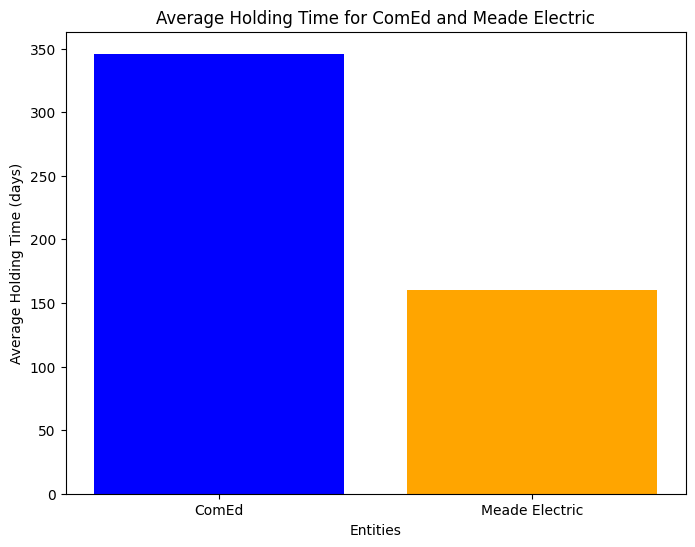

In [33]:
# Data for plotting
entities = ['ComEd', 'Meade Electric']
average_days = [average_date_difference_comed, average_date_difference_meade]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(entities, average_days, color=['blue', 'orange'])
plt.xlabel('Entities')
plt.ylabel('Average Holding Time (days)')
plt.title('Average Holding Time for ComEd and Meade Electric')
plt.show()

In [34]:
avg_holding_time_by_location_days = exe.groupby('Ship To Entity')['Date Difference'].mean().dt.days
print(avg_holding_time_by_location_days)

Ship To Entity
Chicago North     341
Chicago South     278
Joliet            563
Libertyville      501
Maywood           269
Meade Electric    160
Rockford          893
Name: Date Difference, dtype: int64


In [35]:
avg_holding_time_by_location_years = round(avg_holding_time_by_location_days / 365.25, 2)
print(avg_holding_time_by_location_years)

Ship To Entity
Chicago North    0.93
Chicago South    0.76
Joliet           1.54
Libertyville     1.37
Maywood          0.74
Meade Electric   0.44
Rockford         2.44
Name: Date Difference, dtype: float64


C:\Users\heyux\AppData\Local\Temp\ipykernel_18328\3697590427.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average Holding Time (Days)', y='Ship To Entity', data=avg_hold_time_location, palette='viridis')


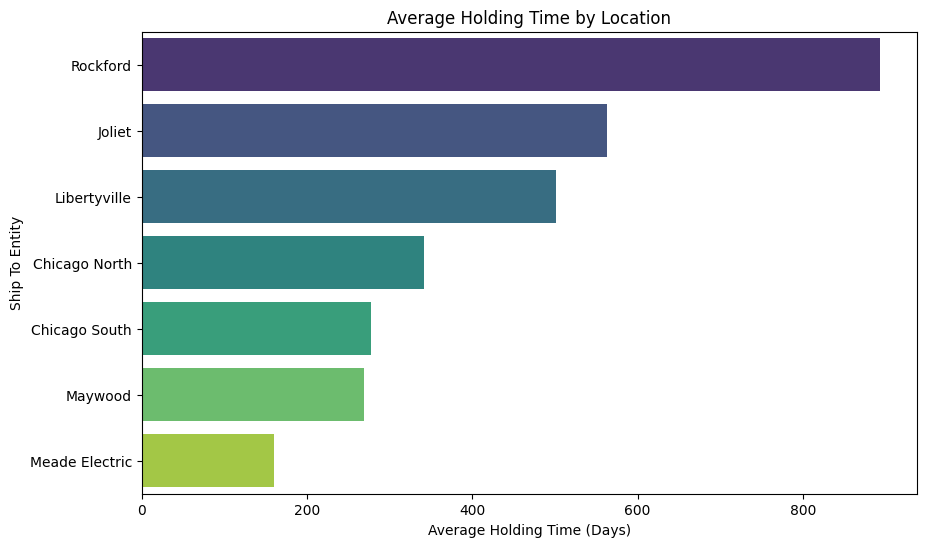

In [36]:
avg_hold_time_location = avg_holding_time_by_location_days.reset_index()
avg_hold_time_location.columns = ['Ship To Entity', 'Average Holding Time (Days)']
avg_hold_time_location = avg_hold_time_location.sort_values(by='Average Holding Time (Days)', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Average Holding Time (Days)', y='Ship To Entity', data=avg_hold_time_location, palette='viridis')
plt.title('Average Holding Time by Location')
plt.xlabel('Average Holding Time (Days)')
plt.ylabel('Ship To Entity')
plt.show()

C:\Users\heyux\AppData\Local\Temp\ipykernel_18328\494801296.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average Holding Time (Years)', y='Ship To Entity', data=avg_holding_time_by_location_years, palette='winter')


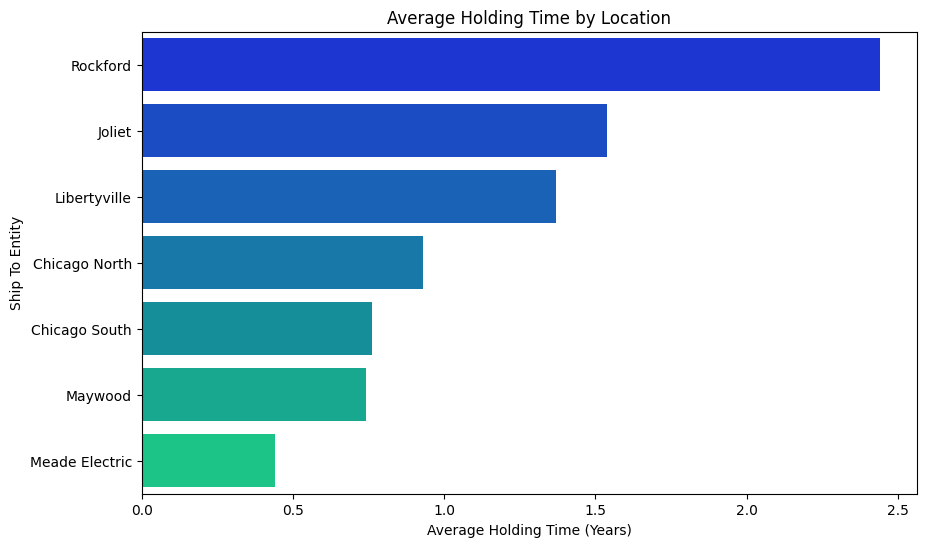

In [37]:
avg_holding_time_by_location_years = avg_holding_time_by_location_years.reset_index()
avg_holding_time_by_location_years.columns = ['Ship To Entity', 'Average Holding Time (Years)']
avg_holding_time_by_location_years = avg_holding_time_by_location_years.sort_values(by='Average Holding Time (Years)', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Average Holding Time (Years)', y='Ship To Entity', data=avg_holding_time_by_location_years, palette='winter')
plt.title('Average Holding Time by Location')
plt.xlabel('Average Holding Time (Years)')
plt.ylabel('Ship To Entity')
plt.show()

# 2. Annual total deposits paid each year

In [38]:
# Grouping by year and summing the deposits
annual_deposits = exe.groupby(exe['Ship Date'].dt.year)['Deposit'].sum()

annual_deposits

Ship Date
2015      99800
2016    1332450
2017     899500
2018     804550
2019     894650
2020     919100
2021     503250
2022     171500
2023      15400
Name: Deposit, dtype: int64

C:\Users\heyux\AppData\Local\Temp\ipykernel_18328\2996953948.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0', '200K', '400K', '600K', '800K', '1000K','1200K','1400K'])


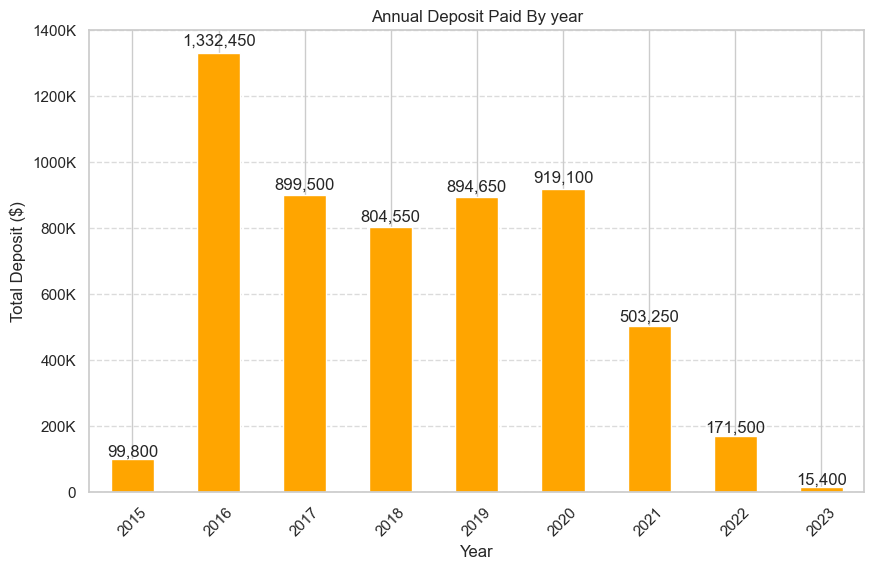

In [39]:
sns.set(style="whitegrid")

# Creating a bar chart
plt.figure(figsize=(10, 6))  # Adjusts the size of the figure
annual_deposits.plot(kind='bar', color='orange')

# Set the y-axis limit to 100k and add a grid
plt.ylim(0, 1400000)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Get the axes object (corrected approach)
ax = plt.gca()

# Set custom y-axis labels
ax.set_yticklabels(['0', '200K', '400K', '600K', '800K', '1000K','1200K','1400K'])

# Add data labels to show the value for each bar
for bar in ax.patches:
    # Get the bar height and add a comma separator for thousands
    height = bar.get_height()
    formatted_height = "{:,}".format(int(height))

    # Get the bar center coordinates
    x, y = bar.get_xy()

    # Add the data label above the bar with some offset
    plt.text(x + bar.get_width() / 2, y + height * 1.01, formatted_height, ha='center', va='bottom')

# Add a title, x-axis label, and y-axis label
plt.title('Annual Deposit Paid By year')  # Title of the plot
plt.xlabel('Year')  # X-axis label
plt.ylabel('Total Deposit ($)')  # Update the y-axis label

# Rotate X-axis labels for better readability 
plt.xticks(rotation=45)

# Show plot 
plt.show()


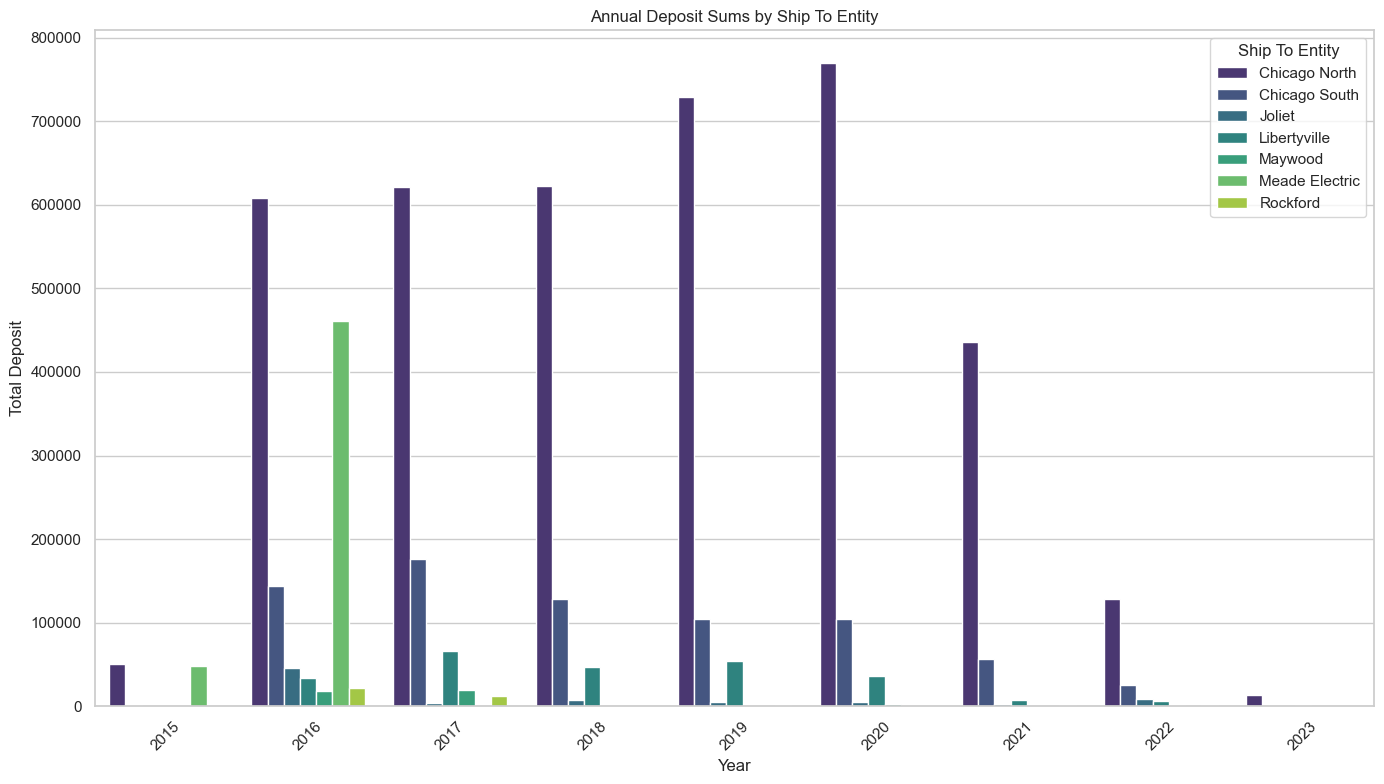

In [40]:
# Extracting the year from 'Ship Date'
exe['Year'] = exe['Ship Date'].dt.year
# Grouping by 'Ship To Entity' and 'Year' and summing the deposits
entity_annual_deposits = exe.pivot_table(values='Deposit', index='Year', columns='Ship To Entity', aggfunc='sum', fill_value=0)

# Resetting index to make 'Year' a column again for plotting
entity_annual_deposits = entity_annual_deposits.reset_index()

# Visualizing the data with a bar chart
plt.figure(figsize=(14, 8))

# We need to melt the DataFrame to have proper columns for seaborn barplot
melted_data = pd.melt(entity_annual_deposits, id_vars='Year', var_name='Ship To Entity', value_name='Total Deposit')

sns.barplot(x='Year', y='Total Deposit', hue='Ship To Entity', data=melted_data, palette='viridis')
plt.title('Annual Deposit Sums by Ship To Entity')
plt.xlabel('Year')
plt.ylabel('Total Deposit')
plt.legend(title='Ship To Entity')
plt.xticks(rotation=45)  # Rotates the X-axis labels for better readability
plt.tight_layout()  # Adjusts plot parameters to give some padding
plt.show()


In [41]:
#Deposits collected every year

In [42]:
# Grouping by year and summing the deposits
annual_deposits_Credited = exe.groupby(exe['Credit Date'].dt.year)['Credit Amount'].sum()

annual_deposits_Credited

Credit Date
2016.00   604445.00
2017.00   918925.00
2018.00   644700.00
2019.00   644137.50
2020.00   595480.00
2021.00   675170.00
2022.00   474540.00
2023.00   166390.00
2024.00     6860.00
Name: Credit Amount, dtype: float64

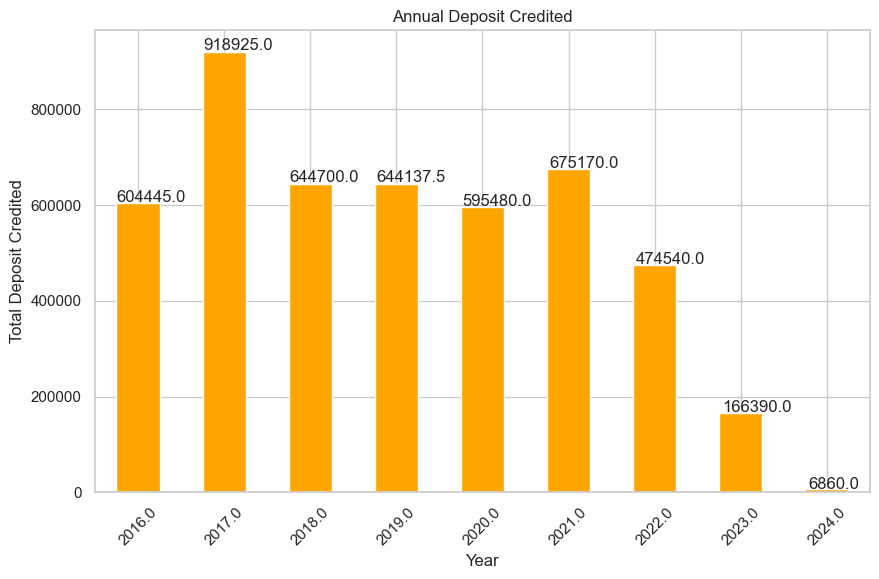

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the seaborn style for aesthetics
sns.set(style="whitegrid")

# Creating a bar chart
plt.figure(figsize=(10, 6))  # Adjusts the size of the figure
ax = annual_deposits_Credited.plot(kind='bar', color='orange')
plt.title('Annual Deposit Credited')  # Title of the plot
plt.xlabel('Year')  # X-axis label
plt.ylabel('Total Deposit Credited')  # Y-axis label
plt.xticks(rotation=45)  # Rotates the X-axis labels for better readability

# Adding values to bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()


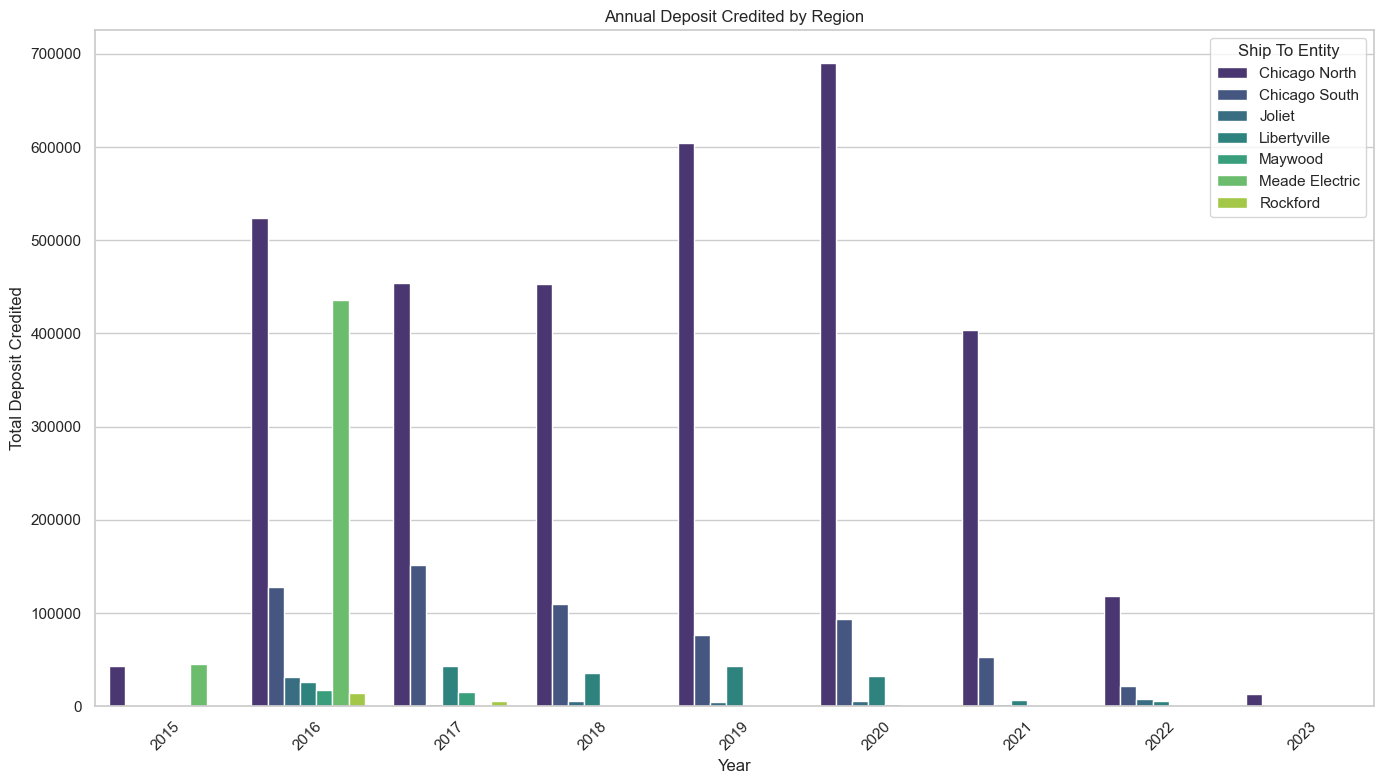

In [44]:
# Grouping by 'Ship To Entity' and 'Year' and summing the deposits
entity_annual_deposits_credited = exe.pivot_table(values='Credit Amount', index='Year', columns='Ship To Entity', aggfunc='sum', fill_value=0)

# Resetting index to make 'Year' a column again for plotting
entity_annual_deposits_credited = entity_annual_deposits_credited.reset_index()

# Visualizing the data with a bar chart
plt.figure(figsize=(14, 8))

# We need to melt the DataFrame to have proper columns for seaborn barplot
melted_data = pd.melt(entity_annual_deposits_credited, id_vars='Year', var_name='Ship To Entity', value_name='Total Deposit')

sns.barplot(x='Year', y='Total Deposit', hue='Ship To Entity', data=melted_data, palette='viridis')
plt.title('Annual Deposit Credited by Region')
plt.xlabel('Year')
plt.ylabel('Total Deposit Credited')
plt.legend(title='Ship To Entity')
plt.xticks(rotation=45)  # Rotates the X-axis labels for better readability
plt.tight_layout()  # Adjusts plot parameters to give some padding
plt.show()

# 3. Lost deposits on an annual basis and accrued basis

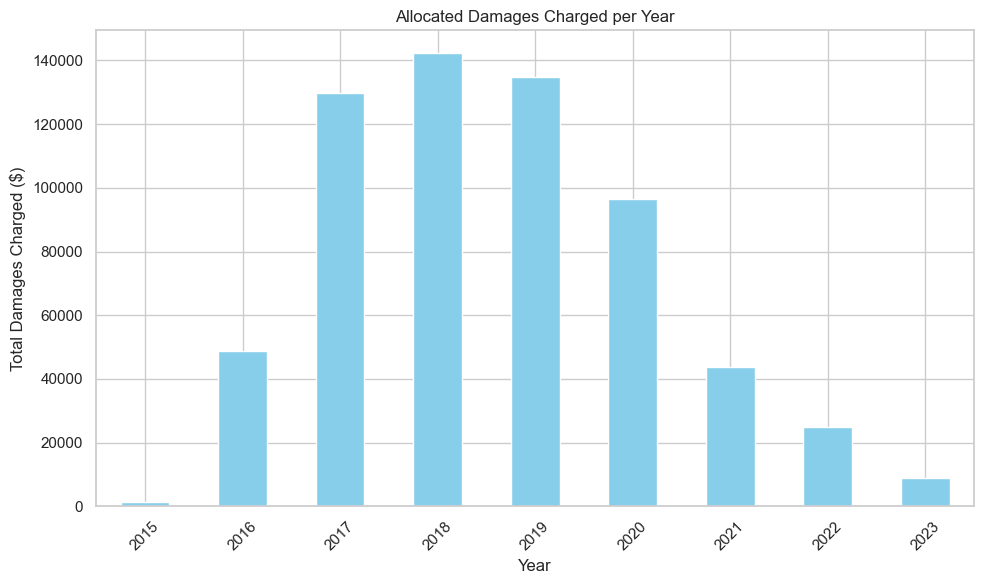

In [45]:
# Ensure 'DamagesCharged' is positive and convert date columns to datetime
exe['DamagesCharged'] = exe['DamagesCharged'].abs()
exe['Ship Date'] = pd.to_datetime(exe['Ship Date'])
exe['Return Date'] = pd.to_datetime(exe['Return Date'])

# Allocate damages to corresponding years
def allocate_damages_yearly(row):
    start_date = row['Ship Date']
    end_date = row['Return Date']
    damages = row['DamagesCharged']
    allocation = {}

    # Check if damages are not NaN
    if pd.isna(damages):
        return pd.Series(allocation)

    total_days = (end_date - start_date).days + 1

    for year in range(start_date.year, end_date.year + 1):
        # For the start year
        if year == start_date.year:
            start_of_period = start_date
        else:
            start_of_period = datetime(year, 1, 1)
        
        # For the end year
        if year == end_date.year:
            end_of_period = end_date
        else:
            end_of_period = datetime(year, 12, 31)
        
        # Days in this period
        days_in_year = (end_of_period - start_of_period).days + 1
        
        # Allocate damages based on the proportion of days in the year
        allocation[year] = (days_in_year / total_days) * damages

    return pd.Series(allocation)

# Apply the allocation function to each row in the DataFrame and sum up the results
total_damages_by_year = exe.apply(allocate_damages_yearly, axis=1).fillna(0).sum().sort_index()

# Plot the total damages per year
plt.figure(figsize=(10, 6))
total_damages_by_year.plot(kind='bar', color='skyblue')
plt.title('Allocated Damages Charged per Year')
plt.xlabel('Year')
plt.ylabel('Total Damages Charged ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [46]:
allocated_damages = exe.apply(allocate_damages_yearly, axis=1).fillna(0).sum().sort_index()
# Aggregate the total damages by 'Return Date' year
exe['Return Year'] = exe['Return Date'].dt.year
total_damages_by_return_year = exe.groupby('Return Year')['DamagesCharged'].sum()

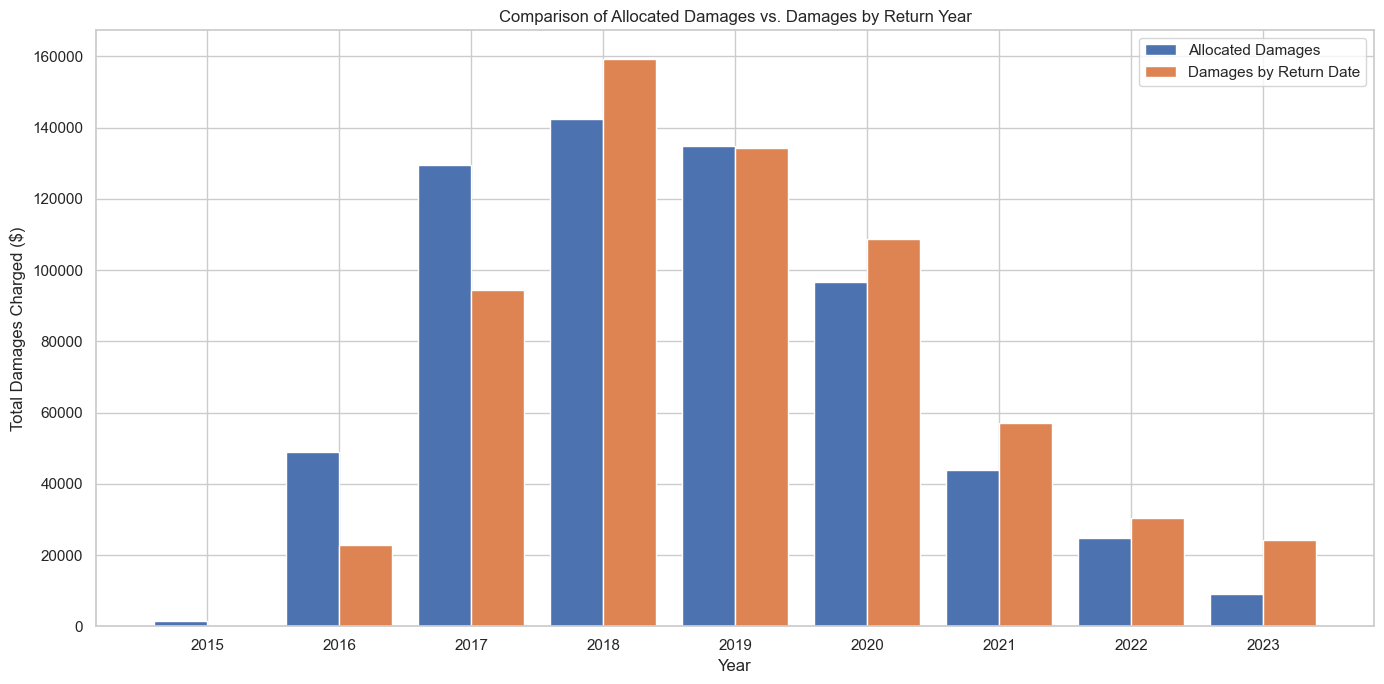

In [47]:
# Plot both sets of data on the same bar chart for comparison
plt.figure(figsize=(14, 7))

# Plotting allocated damages per year
plt.bar(allocated_damages.index - 0.2, allocated_damages.values, width=0.4, label='Allocated Damages', align='center')

# Plotting total damages by return year
plt.bar(total_damages_by_return_year.index + 0.2, total_damages_by_return_year.values, width=0.4, label='Damages by Return Date', align='center')

plt.xlabel('Year')
plt.ylabel('Total Damages Charged ($)')
plt.title('Comparison of Allocated Damages vs. Damages by Return Year')
plt.xticks(list(allocated_damages.index))
plt.legend()
plt.tight_layout()
plt.show()

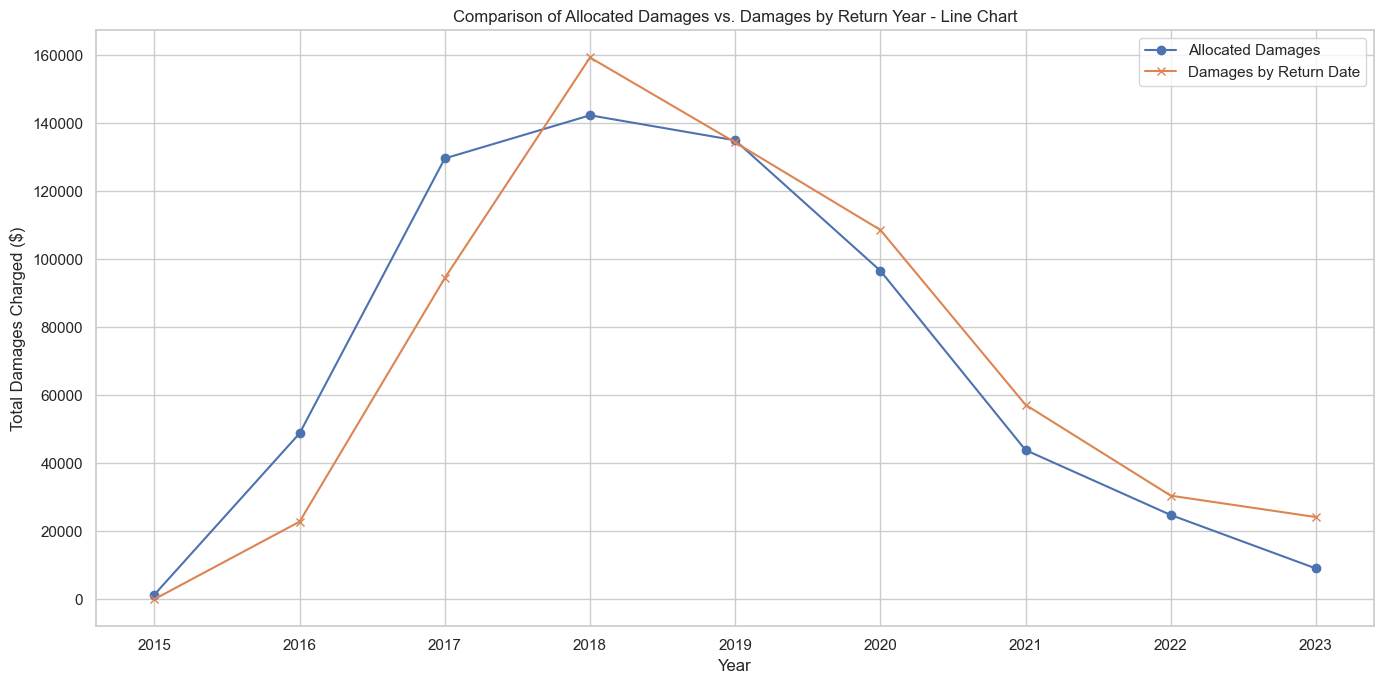

In [48]:
# Ensure indices match for plotting
combined_years = sorted(set(allocated_damages.index).union(set(total_damages_by_return_year.index)))
allocated_damages = allocated_damages.reindex(combined_years, fill_value=0)
total_damages_by_return_year = total_damages_by_return_year.reindex(combined_years, fill_value=0)

# Plot both sets of data on the same line chart for comparison
plt.figure(figsize=(14, 7))

# Plotting allocated damages per year as a line chart
plt.plot(combined_years, allocated_damages, marker='o', linestyle='-', label='Allocated Damages')

# Plotting total damages by return year as a line chart
plt.plot(combined_years, total_damages_by_return_year, marker='x', linestyle='-', label='Damages by Return Date')

plt.xlabel('Year')
plt.ylabel('Total Damages Charged ($)')
plt.title('Comparison of Allocated Damages vs. Damages by Return Year - Line Chart')
plt.xticks(combined_years)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Average length of time each reel is held by ComEd and Meade (days and years with one decimal point for years).

In [49]:
# Filter the DataFrame where 'Bill To Entity' is 'ComEd'
comed_exe = exe[exe['Bill To Entity'] == 'ComEd']
meade_exe = exe[exe['Bill To Entity'] == 'Meade Electric']

# Calculate the average of the date differences
average_date_difference_comed = comed_exe['Date Difference'].mean().days
average_date_difference_meade = meade_exe['Date Difference'].mean().days
average_year_difference_comed = round(average_date_difference_comed / 365.25, 2)
average_year_difference_meade = round(average_date_difference_meade / 365.25, 2)

print("Average holding time for ComEd (days):", average_date_difference_comed)
print("Average holding time for Meade (days):", average_date_difference_meade)
print("Average holding time for ComEd (years):", average_year_difference_comed)
print("Average holding time for Meade (years):", average_year_difference_meade)

Average holding time for ComEd (days): 346
Average holding time for Meade (days): 160
Average holding time for ComEd (years): 0.95
Average holding time for Meade (years): 0.44


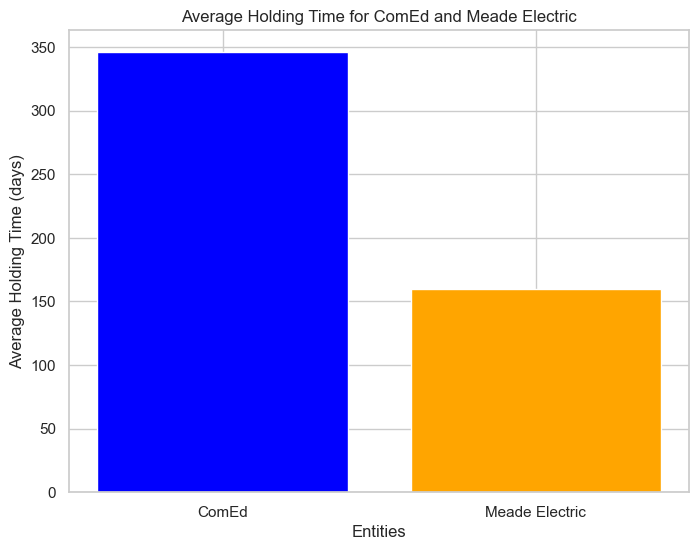

In [50]:
# Data for plotting
entities = ['ComEd', 'Meade Electric']
average_days = [average_date_difference_comed, average_date_difference_meade]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(entities, average_days, color=['blue', 'orange'])
plt.xlabel('Entities')
plt.ylabel('Average Holding Time (days)')
plt.title('Average Holding Time for ComEd and Meade Electric')
plt.show()

In [51]:
avg_holding_time_by_location_days = exe.groupby('Ship To Entity')['Date Difference'].mean().dt.days
avg_holding_time_by_location_years = round(avg_holding_time_by_location_days / 365.25, 2)
print(avg_holding_time_by_location_days)
print(avg_holding_time_by_location_years)

Ship To Entity
Chicago North     341
Chicago South     278
Joliet            563
Libertyville      501
Maywood           269
Meade Electric    160
Rockford          893
Name: Date Difference, dtype: int64
Ship To Entity
Chicago North    0.93
Chicago South    0.76
Joliet           1.54
Libertyville     1.37
Maywood          0.74
Meade Electric   0.44
Rockford         2.44
Name: Date Difference, dtype: float64


C:\Users\heyux\AppData\Local\Temp\ipykernel_18328\3697590427.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average Holding Time (Days)', y='Ship To Entity', data=avg_hold_time_location, palette='viridis')


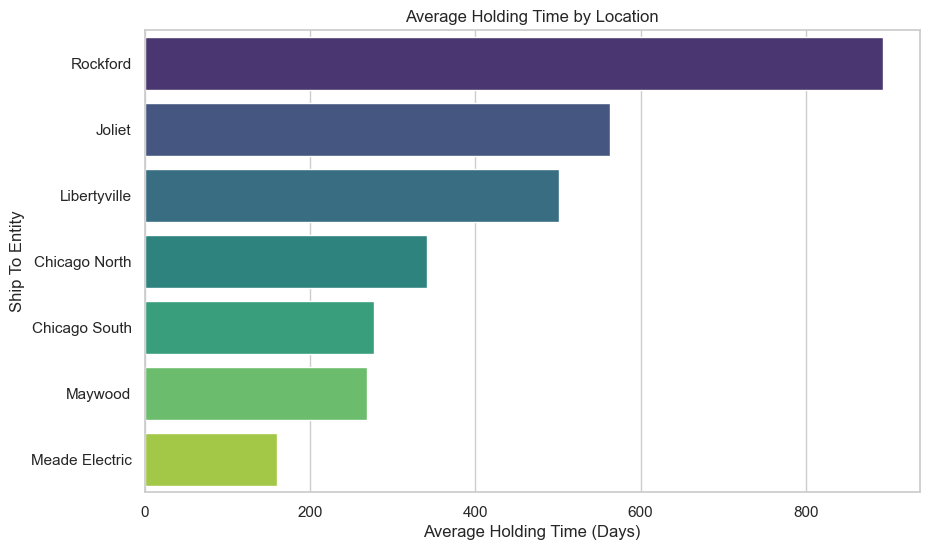

In [52]:
avg_hold_time_location = avg_holding_time_by_location_days.reset_index()
avg_hold_time_location.columns = ['Ship To Entity', 'Average Holding Time (Days)']
avg_hold_time_location = avg_hold_time_location.sort_values(by='Average Holding Time (Days)', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Average Holding Time (Days)', y='Ship To Entity', data=avg_hold_time_location, palette='viridis')
plt.title('Average Holding Time by Location')
plt.xlabel('Average Holding Time (Days)')
plt.ylabel('Ship To Entity')
plt.show()

# 5. Calculation of Year over Year(YoY) Trendline

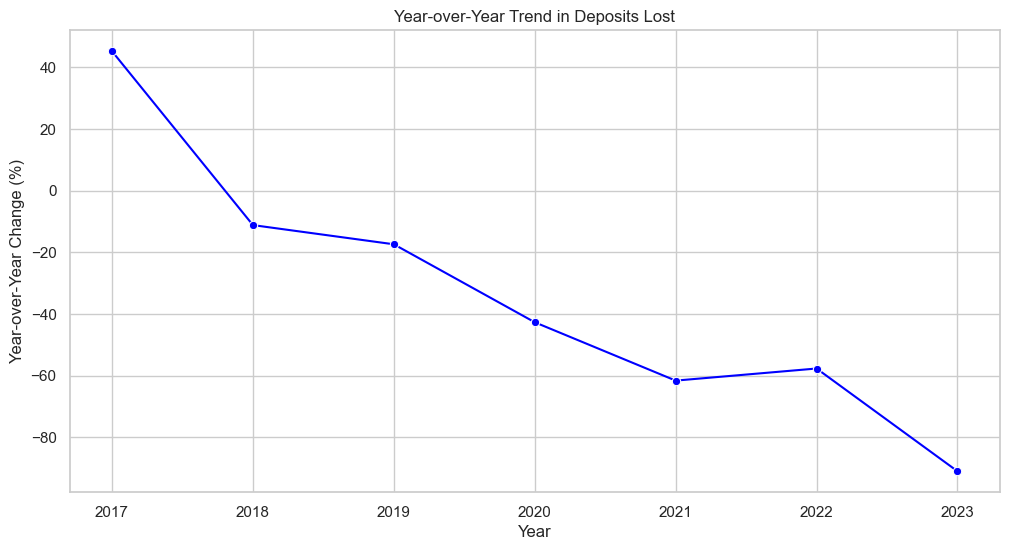

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Ship Date' to datetime and extract the year
exe['Ship Date'] = pd.to_datetime(exe['Ship Date'], dayfirst=True)
exe['Year'] = exe['Ship Date'].dt.year

# Group by 'Year' and sum 'Deposit Lost'
yearly_deposit_lost = exe.groupby('Year')['Deposit Lost'].sum().reset_index()

# Calculate year-over-year change as a percentage
yearly_deposit_lost['YoY Change'] = yearly_deposit_lost['Deposit Lost'].pct_change() * 100
yearly_deposit_lost = yearly_deposit_lost[yearly_deposit_lost['Year'] > 2016]

# Plotting the year-over-year trend line starting from 2017
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_deposit_lost['Year'], y=yearly_deposit_lost['YoY Change'], marker='o', color='blue')
plt.title('Year-over-Year Trend in Deposits Lost')
plt.xlabel('Year')
plt.ylabel('Year-over-Year Change (%)')
plt.grid(True)
plt.show()


# 6. Deposits lost per reels shipped by location

In [54]:
exe['Deposit Lost'].describe()

count   3938.00
mean     229.97
std      385.20
min        0.00
25%        0.00
50%        0.00
75%      280.00
max     2400.00
Name: Deposit Lost, dtype: float64

In [55]:
tot_dep_lost = pd.DataFrame(exe.groupby('Ship To Entity', as_index = False)['Deposit Lost'].sum())
print(tot_dep_lost)
tot_dep_lost.shape

   Ship To Entity  Deposit Lost
0   Chicago North     674892.50
1   Chicago South     105785.00
2          Joliet      19870.00
3    Libertyville      59010.00
4         Maywood       5250.00
5  Meade Electric      26125.00
6        Rockford      14700.00


(7, 2)

In [56]:
reels_shipped = pd.DataFrame(exe['Ship To Entity'].value_counts().reset_index())
reels_shipped.columns = ['Ship To Entity', 'Count']
print(reels_shipped)

   Ship To Entity  Count
0   Chicago North   2795
1   Chicago South    518
2  Meade Electric    337
3    Libertyville    176
4          Joliet     54
5         Maywood     30
6        Rockford     28


In [57]:
dep_lost_locations = pd.DataFrame(exe.groupby('Ship To Entity', as_index=False)['Deposit Lost'].count())
print(dep_lost_locations)

   Ship To Entity  Deposit Lost
0   Chicago North          2795
1   Chicago South           518
2          Joliet            54
3    Libertyville           176
4         Maywood            30
5  Meade Electric           337
6        Rockford            28


In [58]:
merged_df = pd.merge(reels_shipped, dep_lost_locations, on='Ship To Entity', how='left')

# Fill NaN values with 0 for 'Deposit Lost' column
merged_df['Deposit Lost'].fillna(0, inplace=True)

# Calculate 'Deposit Lost/Count' column
merged_df['% of Deposits Lost per Reels Shipped'] = merged_df['Deposit Lost'] / merged_df['Count'] * 100

# Display the result DataFrame
print(merged_df)

   Ship To Entity  Count  Deposit Lost  % of Deposits Lost per Reels Shipped
0   Chicago North   2795          2795                                100.00
1   Chicago South    518           518                                100.00
2  Meade Electric    337           337                                100.00
3    Libertyville    176           176                                100.00
4          Joliet     54            54                                100.00
5         Maywood     30            30                                100.00
6        Rockford     28            28                                100.00


C:\Users\heyux\AppData\Local\Temp\ipykernel_18328\3688242815.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Deposit Lost'].fillna(0, inplace=True)


In [59]:
merged_df = merged_df.sort_values(by = '% of Deposits Lost per Reels Shipped', ascending=False)
print(merged_df)

   Ship To Entity  Count  Deposit Lost  % of Deposits Lost per Reels Shipped
0   Chicago North   2795          2795                                100.00
1   Chicago South    518           518                                100.00
2  Meade Electric    337           337                                100.00
3    Libertyville    176           176                                100.00
4          Joliet     54            54                                100.00
5         Maywood     30            30                                100.00
6        Rockford     28            28                                100.00


C:\Users\heyux\AppData\Local\Temp\ipykernel_18328\1878349498.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=merged_df['Ship To Entity'], y=merged_df['% of Deposits Lost per Reels Shipped'], palette='rocket')


Text(0, 0.5, '%of Deposits Lost per Reels Shipped')

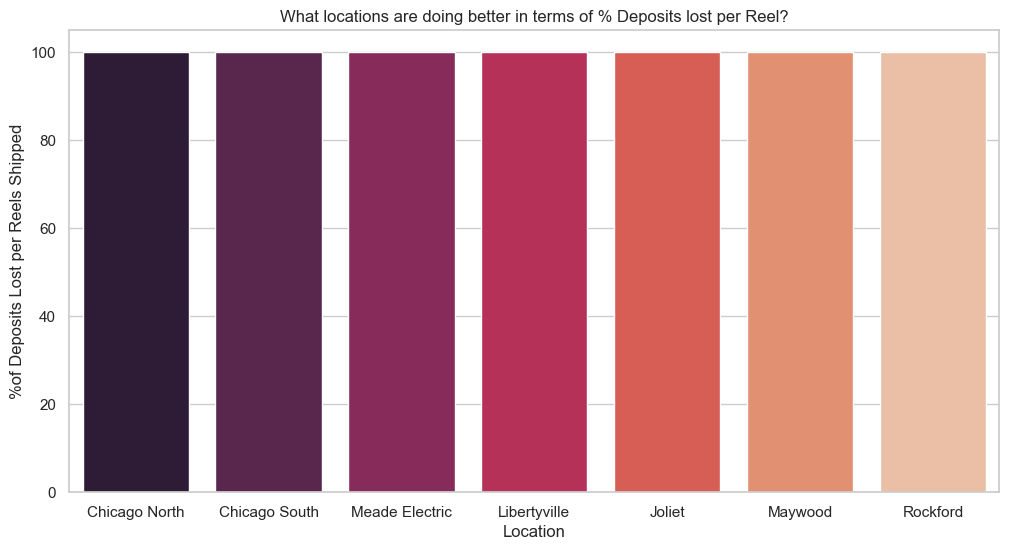

In [60]:
plt.figure(figsize=(12, 6))
sns.barplot(x=merged_df['Ship To Entity'], y=merged_df['% of Deposits Lost per Reels Shipped'], palette='rocket')
plt.title('What locations are doing better in terms of % Deposits lost per Reel?')
plt.xlabel('Location')
plt.ylabel('%of Deposits Lost per Reels Shipped')

# Release 2 Linear regression

In [61]:
exe_ls = exe.copy()

In [62]:
# Replace spaces with underscores in column names
exe_ls.columns = exe_ls.columns.str.replace(' ', '_')
exe_ls.columns = exe_ls.columns.str.replace('#', '')

# Now, let's print the modified column names to verify the changes
print(exe_ls.columns)

Index(['Bill_To', 'Bill_To_Entity', 'Ship_To', 'Ship_To_Entity', 'Name',
       'Reel_Serial_', 'Reel_Size', 'Ship_Date', 'Return_Date',
       'DaysOutstanding', 'Order_', 'OriginalPart', 'Include_in_Analysis',
       'MPG', 'Dimension', 'Credit_Memo', 'Original_Invoice',
       'OriginalShipping_Invoice', 'Ship_ToPO', 'Deposit', 'Credit_Date',
       'AmortizationCharged', 'DamagesCharged', 'Credit_Amount',
       'Date_Difference', 'Deposit_Lost', 'Year', 'Return_Year'],
      dtype='object')


In [63]:
mod = smf.ols(formula='Deposit_Lost ~ Ship_To_Entity + DaysOutstanding + Deposit + DamagesCharged', data=exe_ls)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           Deposit_Lost   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     1199.
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                        09:58:04   Log-Likelihood:                -26432.
No. Observations:                3938   AIC:                         5.288e+04
Df Residuals:                    3928   BIC:                         5.295e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep